In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pylab as plt

import os
os.environ["DJANGO_SETTINGS_MODULE"] = "analyzer.settings"
import sys
import django
django.setup()

In [2]:
import pickle

In [3]:
import scipy as sp
from scipy import stats

In [9]:
import datetime
from datetime import timedelta

In [4]:
# 10日間の天候リスト 降雨ありが1、なしが0
WEATHER = np.array([[0, 0, 0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 1, 1, 1]])
# 10日間の平日休日のリスト 平日が0、休日が1
DAY = np.array([[0, 1, 1, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 1, 1, 1, 0, 0, 0], [1, 0, 1, 0, 0, 0, 1, 1, 0, 0]])

In [113]:
# pickleからデータを開く
with open('kampo_list.pickle', mode='rb') as f:
    keme = pickle.load(f)
# group.name, user_count, start_day, user.username, steps, distance, kampo, step1, step2, ... , step10

In [6]:
mikan_data = keme[np.where( keme[:, 6] == False ), 7:17]
kampo_data = keme[np.where( keme[:, 6] == True ), 7:17]
mikan_data = mikan_data[0, ]
kampo_data = kampo_data[0, ]

# 未完歩の人から、記録が0の人を除いてt検定

In [16]:
datas = keme.copy()
rows = np.array([])
for i in range(len(datas)):
    if sum(datas[i, 7:17]) == 0.0:
        rows = np.append( rows, i )
datas = np.delete( datas, rows, 0 )

In [17]:
sep_mikan_data = datas[np.where( (datas[:, 6] == False) & (datas[:, 2] == datetime.date(2015, 9, 11)) ), 7:17]
sep_kampo_data = datas[np.where( (datas[:, 6] == True) & (datas[:, 2] == datetime.date(2015, 9, 11)) ), 7:17]
sep_mikan_data = sep_mikan_data[0, ]
sep_kampo_data = sep_kampo_data[0, ]

oct_mikan_data = datas[np.where( (datas[:, 6] == False) & (datas[:, 2] == datetime.date(2015, 10, 6)) ), 7:17]
oct_kampo_data = datas[np.where( (datas[:, 6] == True) & (datas[:, 2] == datetime.date(2015, 10, 6)) ), 7:17]
oct_mikan_data = oct_mikan_data[0, ]
oct_kampo_data = oct_kampo_data[0, ]

nov_mikan_data = datas[np.where( (datas[:, 6] == False) & (datas[:, 2] == datetime.date(2015, 11, 1)) ), 7:17]
nov_kampo_data = datas[np.where( (datas[:, 6] == True) & (datas[:, 2] == datetime.date(2015, 11, 1)) ), 7:17]
nov_mikan_data = nov_mikan_data[0, ]
nov_kampo_data = nov_kampo_data[0, ]

In [18]:
# 条件毎にデータを連ねたarrayをつくるぞ
kmp_rainy = np.r_[ np.reshape(sep_kampo_data[:, (5,6)].copy(), (1, -1))[0], 
                    np.reshape(oct_kampo_data[:, (3,5)].copy(), (1, -1))[0],
                    np.reshape(nov_kampo_data[:, (1,2,7,8,9)].copy(), (1, -1))[0] ]
kmp_sunny = np.r_[ np.reshape(sep_kampo_data[:, (0,1,2,3,4,7,8,9)].copy(), (1, -1))[0], 
                  np.reshape(oct_kampo_data[:, (0,1,2,4,6,7,8,9)].copy(), (1, -1))[0], 
                  np.reshape(nov_kampo_data[:, (0,3,4,5,6)].copy(), (1, -1))[0] ]
kmp_week = np.r_[ np.reshape(sep_kampo_data[:, (0,3,4,5,6,7)].copy(), (1, -1))[0], 
                 np.reshape(oct_kampo_data[:, (0,1,2,3,7,8,9)].copy(), (1, -1))[0], 
                 np.reshape(nov_kampo_data[:, (1,3,4,5,8,9)].copy(), (1, -1))[0] ]
kmp_holi = np.r_[ np.reshape(sep_kampo_data[:, (1,2)].copy(), (1, -1))[0], 
                 np.reshape(oct_kampo_data[:, (4,5,6)].copy(), (1, -1))[0], 
                 np.reshape(nov_kampo_data[:, (0,2,6,7)].copy(), (1, -1))[0] ]

mkn_rainy = np.r_[ np.reshape(sep_mikan_data[:, (5,6)].copy(), (1, -1))[0], 
                    np.reshape(oct_mikan_data[:, (3,5)].copy(), (1, -1))[0],
                    np.reshape(nov_mikan_data[:, (1,2,7,8,9)].copy(), (1, -1))[0] ]
mkn_sunny = np.r_[ np.reshape(sep_mikan_data[:, (0,1,2,3,4,7,8,9)].copy(), (1, -1))[0], 
                  np.reshape(oct_mikan_data[:, (0,1,2,4,6,7,8,9)].copy(), (1, -1))[0], 
                  np.reshape(nov_mikan_data[:, (0,3,4,5,6)].copy(), (1, -1))[0] ]
mkn_week = np.r_[ np.reshape(sep_mikan_data[:, (0,3,4,5,6,7)].copy(), (1, -1))[0], 
                 np.reshape(oct_mikan_data[:, (0,1,2,3,7,8,9)].copy(), (1, -1))[0], 
                 np.reshape(nov_mikan_data[:, (1,3,4,5,8,9)].copy(), (1, -1))[0] ]
mkn_holi = np.r_[ np.reshape(sep_mikan_data[:, (1,2)].copy(), (1, -1))[0], 
                 np.reshape(oct_mikan_data[:, (4,5,6)].copy(), (1, -1))[0], 
                 np.reshape(nov_mikan_data[:, (0,2,6,7)].copy(), (1, -1))[0] ]

In [19]:
#T検定する---------------------------------!
kr_ks = stats.ttest_ind( kmp_rainy, kmp_sunny, equal_var=False )
kw_kh = stats.ttest_ind( kmp_week, kmp_holi, equal_var=False  )
mr_ms = stats.ttest_ind( mkn_rainy, mkn_sunny, equal_var=False )
mw_mh = stats.ttest_ind( mkn_week, mkn_holi, equal_var=False )
kr_mr = stats.ttest_ind( kmp_rainy, mkn_rainy, equal_var=False )
ks_ms = stats.ttest_ind( kmp_sunny, mkn_sunny, equal_var=False )
kw_mw = stats.ttest_ind( kmp_week, mkn_week, equal_var=False )
kh_mh = stats.ttest_ind( kmp_holi, mkn_holi, equal_var=False )

#出力する
print u'比較内容  p値  p値<0.05  p値<0.1'
print u'完歩雨-完歩晴', np.around(kr_ks[1], 5), kr_ks[1]<0.05, kr_ks[1]<0.1
print u'完歩平-完歩休', np.around(kw_kh[1], 5), kw_kh[1]<0.05, kw_kh[1]<0.1
print u'未完雨-未完晴', np.around(mr_ms[1], 5), mr_ms[1]<0.05, mr_ms[1]<0.1
print u'未完平-未完休', np.around(mw_mh[1], 5), mw_mh[1]<0.05, mw_mh[1]<0.1
print u'完歩雨-未完雨', np.around(kr_mr[1], 5), kr_mr[1]<0.05, kr_mr[1]<0.1
print u'完歩晴-未完晴', np.around(ks_ms[1], 5), ks_ms[1]<0.05, ks_ms[1]<0.1
print u'完歩平-未完平', np.around(kw_mw[1], 5), kw_mw[1]<0.05, kw_mw[1]<0.1
print u'完歩休-未完休', np.around(kh_mh[1], 5), kh_mh[1]<0.05, kh_mh[1]<0.1

比較内容  p値  p値<0.05  p値<0.1
完歩雨-完歩晴 0.01219 True True
完歩平-完歩休 0.0 True True
未完雨-未完晴 0.20453 False False
未完平-未完休 0.14884 False False
完歩雨-未完雨 0.0 True True
完歩晴-未完晴 0.0 True True
完歩平-未完平 0.0 True True
完歩休-未完休 0.0 True True


# 完歩の判定をチームにして、歩行記録を合算などして検定する

In [22]:
datas = keme.copy()
rows = np.array([])
for i in range(len(datas)):
    if sum(datas[i, 7:17]) == 0.0:
        rows = np.append( rows, i )
datas = np.delete( datas, rows, 0 )

In [105]:
teams = np.array([[]])
i=0
# チームを検索して歩行記録を平均
while i < len(datas):
    hoge = datas[ np.where(datas[:, 0]==datas[i, 0]), 0:17 ]
    hoge = hoge[0]
    sums = np.array([ hoge[0, 6], 
                     np.mean(hoge[:, 7]), 
                     np.mean(hoge[:, 8]), 
                     np.mean(hoge[:, 9]), 
                     np.mean(hoge[:, 10]), 
                     np.mean(hoge[:, 11]), 
                     np.mean(hoge[:, 12]), 
                     np.mean(hoge[:, 13]), 
                     np.mean(hoge[:, 14]), 
                     np.mean(hoge[:, 15]), 
                     np.mean(hoge[:, 16]) ])
    hoge = np.r_[ hoge[0, :3], sums ]
    teams = np.array([hoge]) if i == 0 else np.r_[teams, np.array([hoge])]
    i = i + hoge[1]
    if i > len(datas):
        break
# teams = [team_name, member, start_day, kampo, step1, step2, ..., step10]

In [109]:
sep_mikan_data = teams[np.where( (teams[:, 3] == False) & (teams[:, 2] == datetime.date(2015, 9, 11)) ), 4:14]
sep_kampo_data = teams[np.where( (teams[:, 3] == True) & (teams[:, 2] == datetime.date(2015, 9, 11)) ), 4:14]
sep_mikan_data = sep_mikan_data[0, ]
sep_kampo_data = sep_kampo_data[0, ]

oct_mikan_data = teams[np.where( (teams[:, 3] == False) & (teams[:, 2] == datetime.date(2015, 10, 6)) ), 4:14]
oct_kampo_data = teams[np.where( (teams[:, 3] == True) & (teams[:, 2] == datetime.date(2015, 10, 6)) ), 4:14]
oct_mikan_data = oct_mikan_data[0, ]
oct_kampo_data = oct_kampo_data[0, ]

nov_mikan_data = teams[np.where( (teams[:, 3] == False) & (teams[:, 2] == datetime.date(2015, 11, 1)) ), 4:14]
nov_kampo_data = teams[np.where( (teams[:, 3] == True) & (teams[:, 2] == datetime.date(2015, 11, 1)) ), 4:14]
nov_mikan_data = nov_mikan_data[0, ]
nov_kampo_data = nov_kampo_data[0, ]

In [110]:
# 条件毎にデータを連ねたarrayをつくるぞ
kmp_rainy = np.r_[ np.reshape(sep_kampo_data[:, (5,6)].copy(), (1, -1))[0], 
                    np.reshape(oct_kampo_data[:, (3,5)].copy(), (1, -1))[0],
                    np.reshape(nov_kampo_data[:, (1,2,7,8,9)].copy(), (1, -1))[0] ]
kmp_sunny = np.r_[ np.reshape(sep_kampo_data[:, (0,1,2,3,4,7,8,9)].copy(), (1, -1))[0], 
                  np.reshape(oct_kampo_data[:, (0,1,2,4,6,7,8,9)].copy(), (1, -1))[0], 
                  np.reshape(nov_kampo_data[:, (0,3,4,5,6)].copy(), (1, -1))[0] ]
kmp_week = np.r_[ np.reshape(sep_kampo_data[:, (0,3,4,5,6,7)].copy(), (1, -1))[0], 
                 np.reshape(oct_kampo_data[:, (0,1,2,3,7,8,9)].copy(), (1, -1))[0], 
                 np.reshape(nov_kampo_data[:, (1,3,4,5,8,9)].copy(), (1, -1))[0] ]
kmp_holi = np.r_[ np.reshape(sep_kampo_data[:, (1,2)].copy(), (1, -1))[0], 
                 np.reshape(oct_kampo_data[:, (4,5,6)].copy(), (1, -1))[0], 
                 np.reshape(nov_kampo_data[:, (0,2,6,7)].copy(), (1, -1))[0] ]

mkn_rainy = np.r_[ np.reshape(sep_mikan_data[:, (5,6)].copy(), (1, -1))[0], 
                    np.reshape(oct_mikan_data[:, (3,5)].copy(), (1, -1))[0],
                    np.reshape(nov_mikan_data[:, (1,2,7,8,9)].copy(), (1, -1))[0] ]
mkn_sunny = np.r_[ np.reshape(sep_mikan_data[:, (0,1,2,3,4,7,8,9)].copy(), (1, -1))[0], 
                  np.reshape(oct_mikan_data[:, (0,1,2,4,6,7,8,9)].copy(), (1, -1))[0], 
                  np.reshape(nov_mikan_data[:, (0,3,4,5,6)].copy(), (1, -1))[0] ]
mkn_week = np.r_[ np.reshape(sep_mikan_data[:, (0,3,4,5,6,7)].copy(), (1, -1))[0], 
                 np.reshape(oct_mikan_data[:, (0,1,2,3,7,8,9)].copy(), (1, -1))[0], 
                 np.reshape(nov_mikan_data[:, (1,3,4,5,8,9)].copy(), (1, -1))[0] ]
mkn_holi = np.r_[ np.reshape(sep_mikan_data[:, (1,2)].copy(), (1, -1))[0], 
                 np.reshape(oct_mikan_data[:, (4,5,6)].copy(), (1, -1))[0], 
                 np.reshape(nov_mikan_data[:, (0,2,6,7)].copy(), (1, -1))[0] ]

In [111]:
#T検定する---------------------------------!
kr_ks = stats.ttest_ind( kmp_rainy, kmp_sunny, equal_var=False )
kw_kh = stats.ttest_ind( kmp_week, kmp_holi, equal_var=False  )
mr_ms = stats.ttest_ind( mkn_rainy, mkn_sunny, equal_var=False )
mw_mh = stats.ttest_ind( mkn_week, mkn_holi, equal_var=False )
kr_mr = stats.ttest_ind( kmp_rainy, mkn_rainy, equal_var=False )
ks_ms = stats.ttest_ind( kmp_sunny, mkn_sunny, equal_var=False )
kw_mw = stats.ttest_ind( kmp_week, mkn_week, equal_var=False )
kh_mh = stats.ttest_ind( kmp_holi, mkn_holi, equal_var=False )

#出力する
print u'比較内容  p値  p値<0.05  p値<0.1'
print u'完歩雨-完歩晴', np.around(kr_ks[1], 5), kr_ks[1]<0.05, kr_ks[1]<0.1
print u'完歩平-完歩休', np.around(kw_kh[1], 5), kw_kh[1]<0.05, kw_kh[1]<0.1
print u'未完雨-未完晴', np.around(mr_ms[1], 5), mr_ms[1]<0.05, mr_ms[1]<0.1
print u'未完平-未完休', np.around(mw_mh[1], 5), mw_mh[1]<0.05, mw_mh[1]<0.1
print u'完歩雨-未完雨', np.around(kr_mr[1], 5), kr_mr[1]<0.05, kr_mr[1]<0.1
print u'完歩晴-未完晴', np.around(ks_ms[1], 5), ks_ms[1]<0.05, ks_ms[1]<0.1
print u'完歩平-未完平', np.around(kw_mw[1], 5), kw_mw[1]<0.05, kw_mw[1]<0.1
print u'完歩休-未完休', np.around(kh_mh[1], 5), kh_mh[1]<0.05, kh_mh[1]<0.1

比較内容  p値  p値<0.05  p値<0.1
完歩雨-完歩晴 0.0766 False True
完歩平-完歩休 0.00696 True True
未完雨-未完晴 0.44009 False False
未完平-未完休 0.11627 False False
完歩雨-未完雨 0.0 True True
完歩晴-未完晴 0.0 True True
完歩平-未完平 0.0 True True
完歩休-未完休 0.0 True True


# 完歩の判定を個人にして、t検定をする

In [106]:
# 完歩と未完にわける
mikan_data = teams[np.where( teams[:, 3] == False ), 4:14]
kampo_data = teams[np.where( teams[:, 3] == True ), 4:14]
mikan_data = mikan_data[0, ]
kampo_data = kampo_data[0, ]

# 色々見たくてちょっとプロット

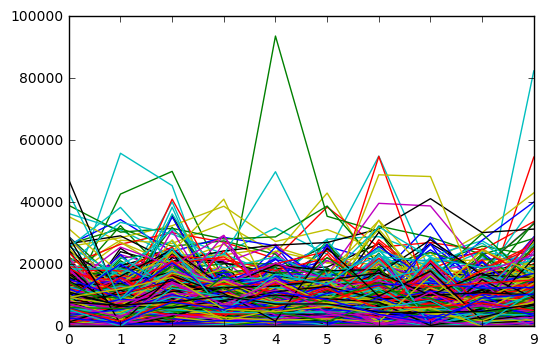

In [115]:
x = np.array( range(10) )
for k in range( len(keme) ):
    label =  'type' + str( k+1 )
    plt.plot(x, keme[k, 7:17], label=label)
plt.xlim(0, 9)
# plt.xticks( [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 23] )
# plt.ylim(0.0, 1.0)
# plt.legend()
# plt.xlabel(u'ほげ' , fontproperties=font)
plt.show()

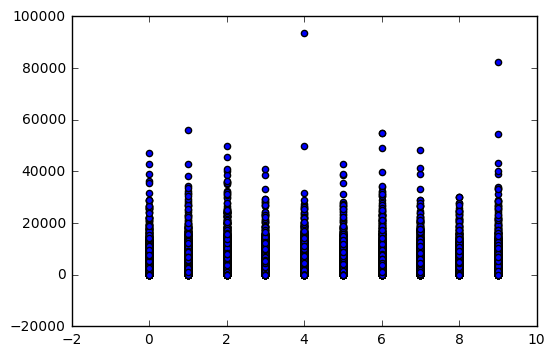

In [118]:
for k in range( len(keme) ):
    plt.scatter(x, keme[k, 7:17])
plt.show()